In this assignment we are supposed to apply SVM i.e. Support vector machine algorithm to train the model to predict the survivor rate. As earlier assignments we ahve applied different algorithms now after applying this algorithm we are supposed to compare all the algorithms based on the results.

In [59]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Importing datasets
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [61]:
#Top 5 rows of the training dataset
train_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [62]:
#Top 5 rows of the test dataset
test_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [63]:
#Information of training data
train_data.info

<bound method DataFrame.info of      Unnamed: 0  PassengerId  Survived  Sex  ...  Title_4  Emb_1  Emb_2  Emb_3
0             0            1         0    1  ...        0      0      0      1
1             1            2         1    0  ...        0      1      0      0
2             2            3         1    0  ...        1      0      0      1
3             3            4         1    0  ...        0      0      0      1
4             4            5         0    1  ...        0      0      0      1
..          ...          ...       ...  ...  ...      ...    ...    ...    ...
787         787          788         0    1  ...        0      0      1      0
788         788          789         1    1  ...        0      0      0      1
789         789          790         0    1  ...        0      1      0      0
790         790          791         0    1  ...        0      0      1      0
791         791          792         0    1  ...        0      0      0      1

[792 rows x 17 colu

In [64]:
#Dropping unproductive table
train_data.drop("Unnamed: 0",axis=1, inplace= True)
test_data.drop("Unnamed: 0",axis=1, inplace= True)
train_data.drop("PassengerId",axis=1, inplace= True)
test_data.drop("PassengerId",axis=1, inplace= True)

In [65]:
#Spliting datasets into dependent & independent variable
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("Survived", axis=1)
y_test = test_data["Survived"]

In [66]:
#Checking the training model
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
787    0
788    1
789    0
790    0
791    0
Name: Survived, Length: 792, dtype: int64


In [67]:
#Applying the model on the dataset
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

After applying all the split and importing the libraries its time to apply the model. 

In [68]:
#Applying Support vector model with linear model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
#Predicting the values with the model built on linear kernel
y_pred = classifier.predict(X_test)

In [71]:
# Get the separating hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - classifier.intercept_[0]/ w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = classifier.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = classifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

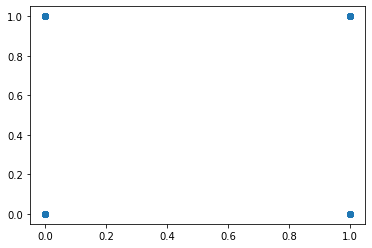

In [72]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);

In [75]:
#Classification report for model built with linear kernel
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.74      0.81      0.77        36

    accuracy                           0.83       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



Now using the kernel rbf for performing the support vector machine algotrithm to check and compare with the linear kernel of SVM

In [83]:
#Applying Support vector model with rbf model
classifier_rbf = SVC(kernel = 'rbf', random_state = 0)
classifier_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
#Predicting the values with the model built on linear kernel
y_pred_rbf = classifier_rbf.predict(X_test)

In [81]:
#Classification report for model built with linear kernel
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        64
           1       0.93      0.69      0.79        36

    accuracy                           0.87       100
   macro avg       0.89      0.83      0.85       100
weighted avg       0.88      0.87      0.86       100



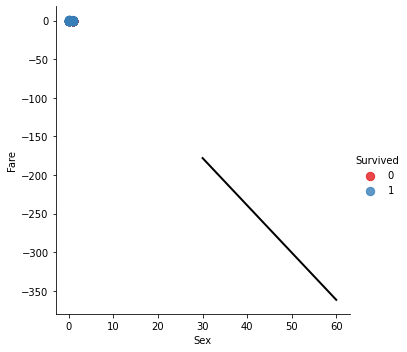

In [20]:
# Plot the hyperplane
sns.lmplot('Sex', 'Fare', data=test_data, hue='Survived', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

Now as we have applied the SVM model with the C value and respective kernel it is important to find the best value so that our model can be trained more robustly. 

In [21]:

# Put models in dictionary to make function
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNN(n_neighbors = 7),
         "Decision": DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf=3, min_samples_split=14 ,random_state= 42),
          "SVM": SVC(kernel = 'rbf', random_state = 0)}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    """
    Fits and evaluate given machine learnin models.
    models: A dict of different Scikit-larn machine learning models
    X_train: training data
    X_test: testinng data
    y_train: traininng labels
    y_test: test labels
    """
    #set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [22]:
#Calculating the score
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test= X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'Decision': 0.87, 'KNN': 0.82, 'Logistic Regression': 0.88, 'SVM': 0.87}

In [ ]:
y_pred = classifier.predict(X_test)

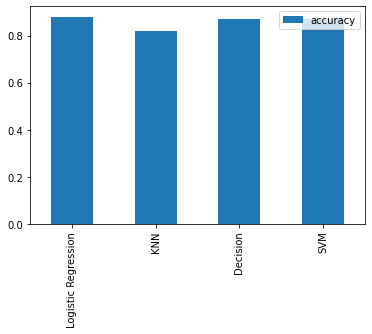

In [23]:
#Model comaprision
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();